# Resampling methods: the "bootstrap"

## Lecture plan

- What is **resampling**?
- The *bootstrap*, explained.  
- Using the boostrap for *confidence intervals*.  

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## What is "resampling"?

> [**Resampling**](https://en.wikipedia.org/wiki/Resampling_(statistics)) refers to any statistical technique that involves creating *new samples* based on one observed sample.

- Often, we are stuck with only one sample from our **population**.  
- **Resampling** techniques exploit the logic of sampling to get more *power* from that sample. 
- Basic premise: use the data itself to produce *empirical estimates* for test statistics, confidence intervals, and generalizability.

### Why resampling is useful

**Resampling** has a number of applications, and can be deployed in different ways.

1. **Permutation tests**: Is some *observed test statistic* larger than you'd expect by chance?  
2. **Cross-validation**: How well does a relationship found in *one sample* generalize to another?
3. **Bootstrapping**: How accurate or precise is our *sample estimate*?

We've already discussed 1 and 2 (in CSS 2). Today, we'll focus on 3.



## The *bootstrap*

> The [**bootstrap**](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) is a resampling method used to estimate statistics on a dataset by [sampling with replacement](https://en.wikipedia.org/wiki/Sampling_(statistics)#Replacement_of_selected_units).

- Sampling with replacement = allows the same *observation* to be drawn multiple times in a given sample. 

### How happy are students at UCSD?

- Suppose we want to know how **happy** students are at UCSD.  
- We can't survey everyone, so we survey a **sample** of 100 students. 
   - Basic logic: if this sample is *representative*, we can generalize to the underlying population.
- Within this sample, we can calculate a mean `Happiness`.  
- But how *precise* is this estimate?

In [7]:
df_happiness = pd.read_csv("data/resampling/happiness.csv")
df_happiness.head(2)

,Happiness
0,83
1,87


In [8]:
### How good of an estimate is this number?
df_happiness['Happiness'].mean()

79.33

#### Check-in: the traditional approach

How would you estimate the *precision* of this estimate, i.e., calculate a **confidence interval**? What other metrics would you need?

In [9]:
### Your code here

#### The traditional approach

- As discussed in CSS 2, we can calculate the **standard error of the mean**.  

$\Large \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$

- If our distribution of sample means is normal, we can use $\sigma_{\bar{X}}$ to estimate a $95\%$ confidence interval.

In [10]:
### Calculate standard error of the mean
df_happiness['Happiness'].sem()

0.9339884064774804

In [11]:
### Calculate standard error of the mean
conf_int = [df_happiness['Happiness'].mean() - 2 * df_happiness['Happiness'].sem(),
            df_happiness['Happiness'].mean() + 2 * df_happiness['Happiness'].sem()]
conf_int

[77.46202318704503, 81.19797681295496]

### Bootstrapping: an alternative approach

- Using $\sigma_{\bar{X}}$ is a useful and common approach.  
- However, it is based on **theoretical assumptions** about the shape of the underlying distribution. 
  - Assumptions could be wrong; also harder to explain and interpret.  
  - Assumptions not always as applicable to other test statistics
- Bootstrapping is an **empirical method** that uses the structure of the data to estimate measures of *accuracy* (e.g., a confidence interval). 

**Comparison**: Similar to the difference between a t-test (theoretical, relies on assumptions) to a permutation test (empirical, relies on structure of data)!

### Advantages of the bootstrap

- The key advantage is that it is **empirical**.
   - Does not depend as much on theoretical assumptions.  
- This makes it more **flexible**.
   - Can be applied to many different kinds of test statistics and distributions. 
- In some ways, more **interpretable**. 
   - Because it's empirical, not theoretical, it is in some ways easier to understand.
   
Again, useful to compare here to benefits of **permutation test**.

### Bootstrapping, explained

**Basic premise**: 

- Taking many *samples* of size $n$ (with **replacement**) from our existing dataset...
- ...calculating some sample statistic (e.g., the `mean` for each one)...
- ...will give us an estimate of the *range* of sample statistics we'd expect...
- ...given samples of the same size and distribution shape. 

Why **sampling with replacement**?

### Why sampling with replacement?

> In **sampling with replacement**, we "replace" each observation after we've sampled it, allowing for the possibility that the same possibility is drawn multiple times in a given sample.

- **Mimicking the sampling process**.
  - Traditionally, we assume multiple samples from a population are *independent*.  
  - Sampling with replacement mimics that process of drawing multiple, independent samples from a population.
- **Statistical rigor**.
  - Each "sample" we create will reflect the underlying statistical properties of our original sample.  
  - Useful for creating **empirical sampling distribution**. 

### The bootstrap: step-by-step

1. Calculate the desired *sample statistic* on your original sample.  
2. Then, use **sampling with replacement** to draw $N$ (where $N ≥ 1000$) samples from your original sample, where each sample is the same size as the original.  
3. For each sample in (2), calculate the same sample statistic.  
4. Use the distribution of sample statistics in (3) to produce a confidence interval or precision estimate.

## The bootstrap in practice

In this section, we'll *apply* the bootstrap to a dataset altogether, and then you'll get some hands-on practice applying it yourself.

### Step 1: Calculate sample statistic

- Recall that the mean happiness of our sample (`n = 100`) was approximately 79. 

In [22]:
original_estimate = df_happiness['Happiness'].mean()
original_estimate

79.33

### Steps 2-3: sampling with replacement

- Now, we can use either `numpy` to sample *with replacement*.  
   - (We could also use `pandas.sample`)
- For each sample, we'll calculate the sample mean.

**Note**: Each sample should be the same size as our original sample.

In [23]:
### Sampling with numpy
sample_statistics = []
for i in range(0, 1000):
    sampled_data = np.random.choice(df_happiness['Happiness'], 
                                    size=100, 
                                    replace=True)
    sample_statistics.append(sampled_data.mean())

### Step 4: creating our interval!

- Now, we can create a **confidence interval**.  
- E.g., a $95\%$ confidence interval could be obtained by looking at the 2.5th and 97.5th percentiles of our empirical distribution.

In [24]:
### creating our empirical confidence interval
conf_interval = np.percentile(sample_statistics, [2.5, 97.5])
conf_interval

array([77.4595, 81.12  ])

### Beyond confidence intervals: visualization

Text(0.5, 0, 'Distribution of sample means using bootstrapping')

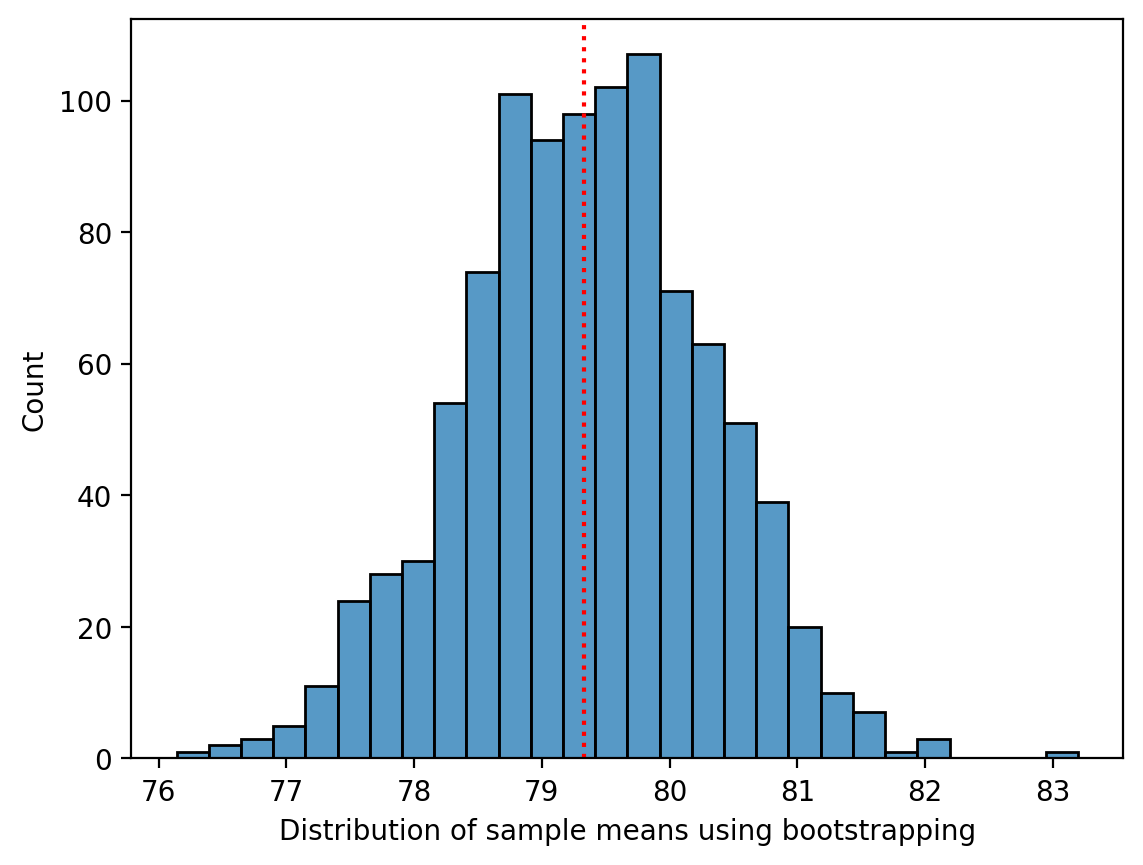

In [25]:
sns.histplot(sample_statistics)
plt.axvline(original_estimate, color = "red", linestyle = "dotted")
plt.xlabel("Distribution of sample means using bootstrapping")

### Using the boostrap yourself

Now, let's try to *apply* this to the `Reaction Time` dataset. We'll also make things a bit more complex.

- Calculate the `mean` `Reaction Time` for `Short` and `Long` words.  
- Use bootstrapping to create empirical distributions of *mean* `Reaction Time` for `Short` and `Long` words. 
- Use those empirical distributions to create a $95\%$ confidence interval.
- Create a visualization of these confidence intervals.  

In [26]:
df_rt = pd.read_csv("data/resampling/example.csv")
df_rt.head(2)

,Length,Reaction Time
0,Short,216.800352
1,Short,244.284309


In [27]:
### Your code here

### Applying the bootstrap (1)

In [28]:
### First, calculate mean short/long words
df_grouped = df_rt.groupby("Length").mean("Reaction Time")
mean_long = df_grouped['Reaction Time']['Long']
mean_short = df_grouped['Reaction Time']['Short']
print(mean_long)
print(mean_short)

237.4482972576716
201.23116016220902


### Applying the bootstrap (2a)

Creating our bootstrapped distributions.

In [29]:
### Create our two original distributions
short_rt = df_rt[df_rt['Length'] == 'Short']['Reaction Time']
long_rt = df_rt[df_rt['Length'] == 'Long']['Reaction Time']

In [33]:
### Bootstrap for short RTs
short_bootstrap = []
for i in range(0, 1000):
    sampled_data = np.random.choice(short_rt, size=100, replace=True)
    short_bootstrap.append(sampled_data.mean())

In [34]:
### Bootstrap for sholongrt RTs
long_bootstrap = []
for i in range(0, 1000):
    sampled_data = np.random.choice(long_rt, size=100, replace=True)
    long_bootstrap.append(sampled_data.mean())

### Applying the bootstrap (2b)

Looking at the *mean* of our bootstrapped distributions.

In [35]:
sum(short_bootstrap)/len(short_bootstrap)

201.20906877754177

In [36]:
sum(long_bootstrap)/len(long_bootstrap)

237.5786440452042

### Applying the bootstrap (3)

Creating two **confidence intervals**. 

In [37]:
### short RTs
conf_interval_short = np.percentile(short_bootstrap, [2.5, 97.5])
conf_interval_short

array([189.97217932, 211.15906432])

In [38]:
### short RTs
conf_interval_long = np.percentile(long_bootstrap, [2.5, 97.5])
conf_interval_long

array([228.00541933, 247.48029947])

### Applying the bootstrap (4)

Visualizing our confidence intervals using `matplotlib`.

Text(0.5, 0, 'Bootstrapped mean RT')

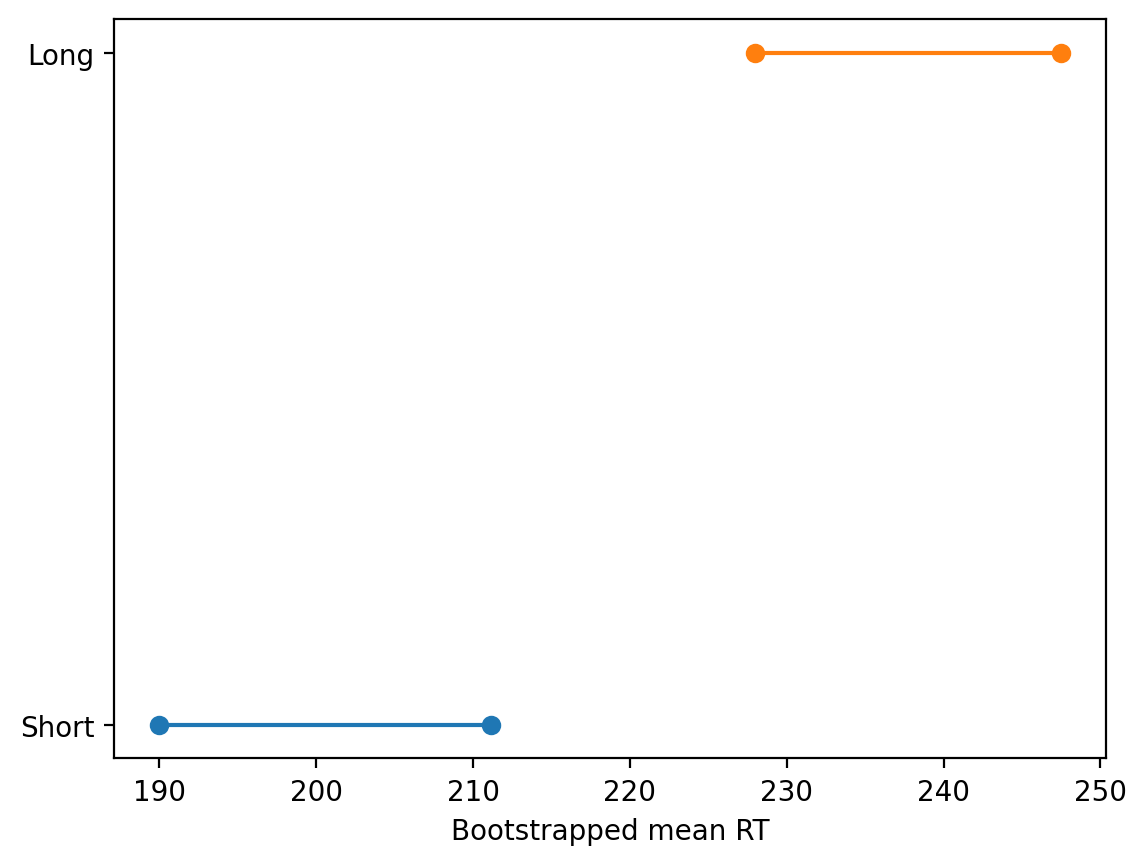

In [39]:
intervals = [conf_interval_short, conf_interval_long]

labels = ['Short', 'Long']

# Plot each interval as a line on the y-axis
for i, interval in enumerate(intervals):
    plt.plot(interval, [i, i], marker='o', label = labels[i])

plt.yticks(range(len(intervals)), labels)
plt.xlabel("Bootstrapped mean RT")

### Applying the bootstrap (5)

Visualizing our raw bootstrap data using `seaborn`.

In [40]:
df_bootstrap = pd.DataFrame({'short': short_bootstrap, 'long': long_bootstrap})
df_bootstrap_melted = pd.melt(df_bootstrap, var_name="Condition", value_name = "bootstrapped_mean")

<Axes: xlabel='Condition', ylabel='bootstrapped_mean'>

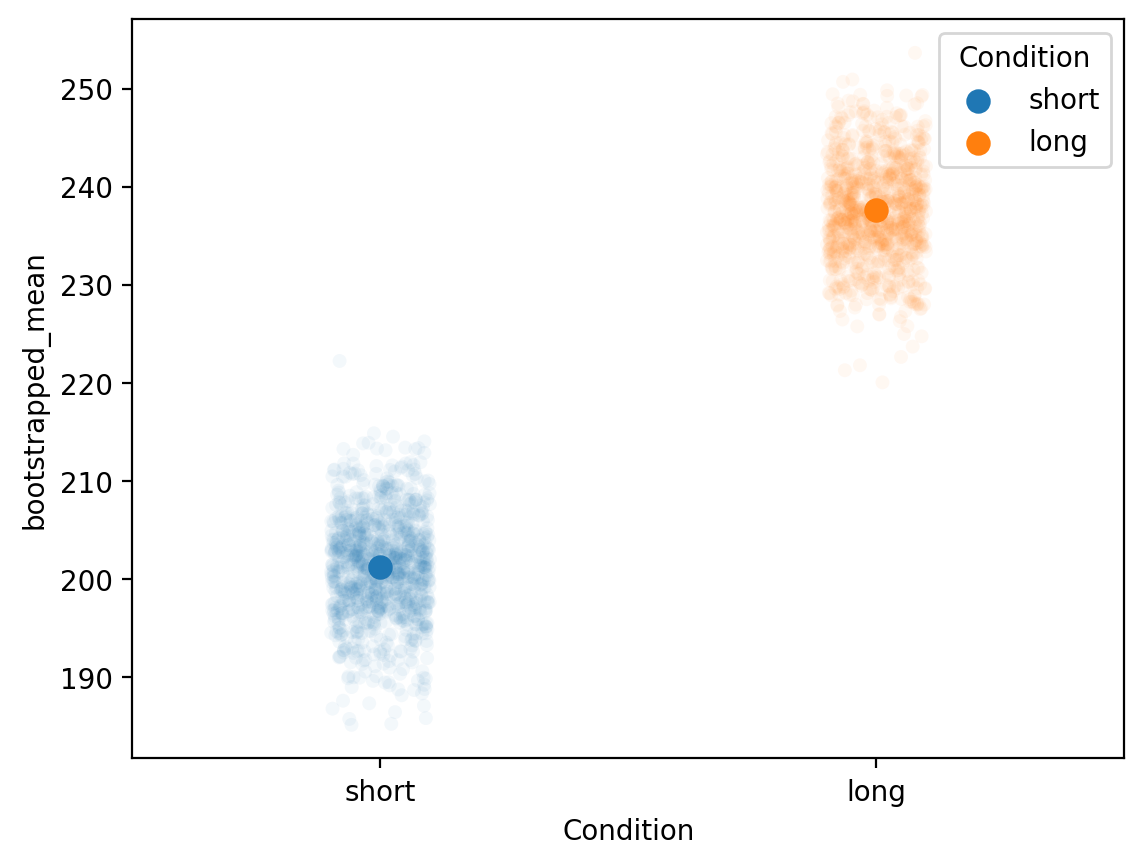

In [41]:
sns.stripplot(data = df_bootstrap_melted, 
              x = "Condition", 
              y = "bootstrapped_mean", alpha = .05)
sns.pointplot(data = df_bootstrap_melted, 
              x = "Condition", 
              y = "bootstrapped_mean",
             hue = "Condition")

## Lecture wrap-up

- The **bootstrap** is another example of how powerful *resampling methods* can be.  
- Today, we've focused on applying it to fairly *narrow* cases.  
- But like **permutation tests**, it is widely applicable and is an extremely valuable *analytical tool* in your toolkit.